# Salary based on Gender and Experience in 2017

## Business Understanding

How much for men and women earn based on their experince? Do male and female receive equal pay? <br>
This is always the interested topic whether female receive the same amount of pay to male and how  experience are related to salary pay.<br>
In 1963, the congress write an equal pay act to help female to earn as much as male. In the modern era, does female really receive same amount of pay to male?
In this project, we are going to find insights for salary based on gender and experience.

## Data

Data from Stackoverflow’s 2017 <br> 
https://www.kaggle.com/stackoverflow/so-survey-2017

## Find Insights

1. The overall salary in 2017. 
2. The salary based on experience or gender.
3. The salary based on experience and gender.

## Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 154 columns):
Respondent                          51392 non-null int64
Professional                        51392 non-null object
ProgramHobby                        51392 non-null object
Country                             51392 non-null object
University                          51392 non-null object
EmploymentStatus                    51392 non-null object
FormalEducation                     51392 non-null object
MajorUndergrad                      42841 non-null object
HomeRemote                          44008 non-null object
CompanySize                         38922 non-null object
CompanyType                         38823 non-null object
YearsProgram                        51145 non-null object
YearsCodedJob                       40890 non-null object
YearsCodedJobPast                   974 non-null object
DeveloperType                       36125 non-null object
WebDeveloperType       

#### In this data, we have 154 different columns. Many of the columns contains Null Data, we may consider droping the null or filling the null for furtuer investigation in the future.

In [3]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


**Summary for the features, including mean and std**

## Data Prepartation

We are more interesting to see how's the salary related to the gender and experience. By filling the NA values,  it will make salary have large impact on the count for each salary.  I decide to drop it instead.

In [4]:
df = df.dropna(axis=0, subset=['Salary'])

After running the above code, all the salay with NA values will be dropped from the dataset.

# 1. How's the overall salary looks like?

Let's plot histogram to understand how many people in each salary bucket.

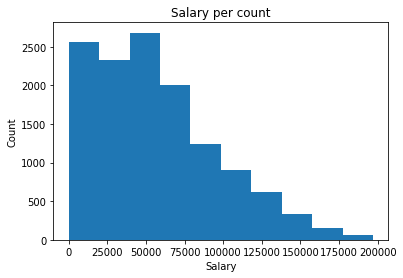

In [5]:
plt.hist(data = df, x = 'Salary')
plt.title('Salary per count')
plt.xlabel('Salary')
plt.ylabel('Count');

Let's look at the log transformation on the x-axis.

In [6]:
df.Salary

2        113750.000000
14       100000.000000
17       130000.000000
18        82500.000000
22       100764.000000
             ...      
51371     74193.548387
51378    107526.881720
51382     32258.064516
51387     58000.000000
51390     40000.000000
Name: Salary, Length: 12891, dtype: float64

In [7]:
def process_log_file(attr):
    """
    Take attribute to make the xscale as log
    
    Arguments:
    attr: x that you want to take log 

    Returns:
    binedges
    """
    bin_edges = 10 ** np.arange(1, np.log10(attr.max())+0.1, 0.1)
    plt.xscale('log')
    tick_locs = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000,300000]
    plt.xticks(tick_locs, tick_locs, rotation = 30)
    return(bin_edges)

''

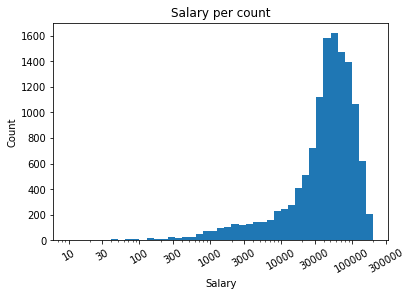

In [8]:
bin_edges = process_log_file(df.Salary)
plt.hist(df.Salary, bins = bin_edges)
plt.title('Salary per count')
plt.xlabel('Salary')
plt.ylabel('Count')
;

Most people earn from 30k to 100k

## 2.The salary based on experience or gender.

In [9]:
df.Gender.value_counts()

Male                                                       10666
Female                                                       819
Other                                                         49
Male; Other                                                   44
Gender non-conforming                                         43
Male; Gender non-conforming                                   21
Female; Transgender                                           19
Female; Gender non-conforming                                 13
Transgender                                                    8
Male; Female; Transgender; Gender non-conforming; Other        6
Male; Female                                                   5
Male; Transgender                                              4
Transgender; Gender non-conforming                             4
Female; Transgender; Gender non-conforming                     3
Male; Gender non-conforming; Other                             1
Female; Transgender; Othe

We only want to pull out the male and female only because majorities are located in this field. The field with few data will have bias solution. 

In [10]:
sub = df.query('Gender == "Male" | Gender == "Female"')

In [11]:
def plot_theme(plot):
    """
    To make the plot with larger lable and rotation X with 30 degrees
    
    Arguments:
    plot: The plot that you want to style

    Returns:
    None
    """
    for ax in plot.axes.flat:
    # This only works for the left ylabels
        ax.set_ylabel(ax.get_ylabel(), fontsize='xx-large')
        ax.set_xlabel(ax.get_xlabel(), fontsize='xx-large')
        for label in ax.get_xticklabels():
            label.set_rotation(30)

Let's try to plot the histogram for the salay based on genders.

''

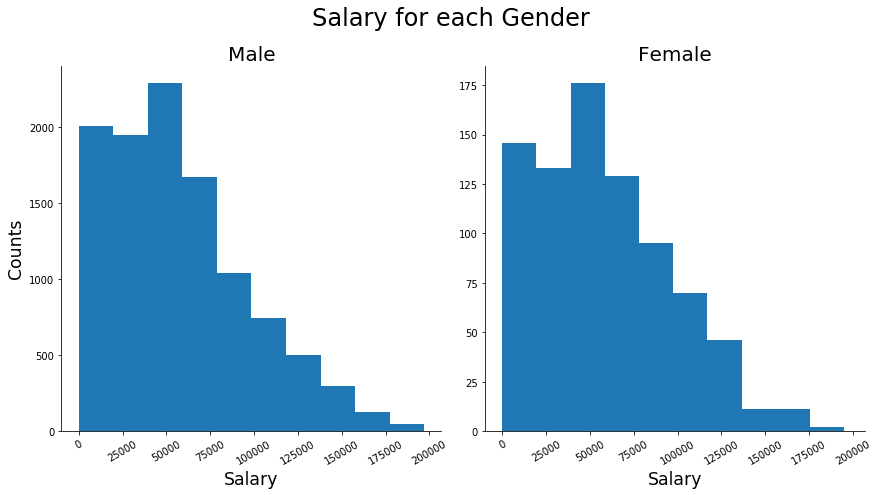

In [12]:
base_color = sns.color_palette()[0]
g = sns.FacetGrid(sub, col="Gender", height=6, sharey = False)
g.map(plt.hist, "Salary", color=base_color)
g.set_axis_labels("Salary", "Counts")
g.set_titles(col_template = '{col_name}', size=20)
g.fig.suptitle('Salary for each Gender', y=1.08, fontsize=24)
plot_theme(g)
;


No different between male's salary and female's salary. Let's look at the log transformation.

''

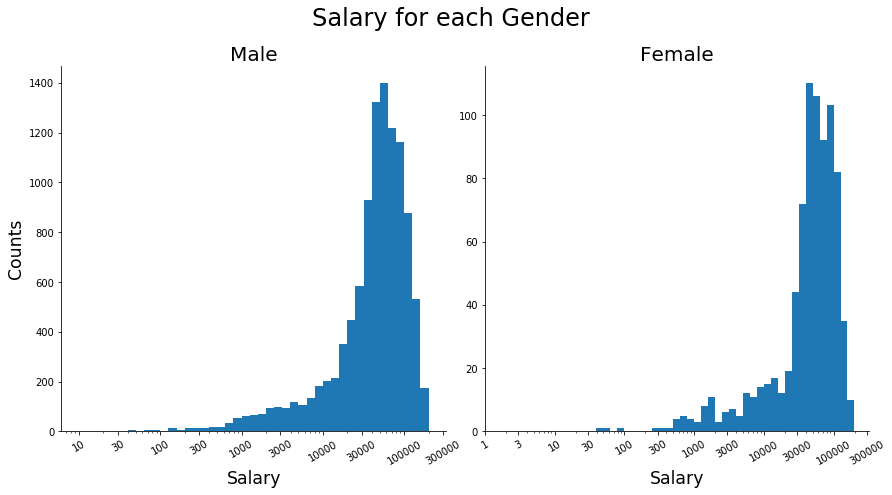

In [13]:
base_color = sns.color_palette()[0]
g = sns.FacetGrid(sub, col="Gender", height=6, sharey = False)
g.map(plt.hist, "Salary", color=base_color, bins=bin_edges)
g.set_axis_labels("Salary", "Counts")
g.set_titles(col_template = '{col_name}', size=20)
g.fig.suptitle('Salary for each Gender', y=1.08, fontsize=24)
plot_theme(g)
binedges = process_log_file(df.Salary)
;

After the log transformation, I can't tell there's different between male's and female's salary.

Let's look at the salary based on experience. 

In [14]:
df['Year_Code'] = df.YearsCodedJob.str.split(" ", n = 1, expand = True)[0]

Pull out the experience from the Year_Code data.

In [15]:
df['Year_Code'] = df['Year_Code'].str.replace('Less','0')

If the experiene is less than 1 year, the people have 0 years of experience.

''

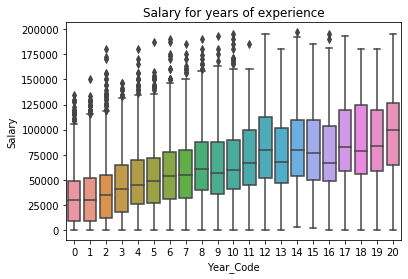

In [16]:
sub2 = df.dropna(axis=0, subset=['Year_Code'])
n_order = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
sns.boxplot(data = sub2, x = 'Year_Code', y = 'Salary', order = n_order)
plt.ylabel('Salary')
plt.title('Salary for years of experience')
;



We can see the salary increase as experience increase.

3.The salary based on experience and gender.

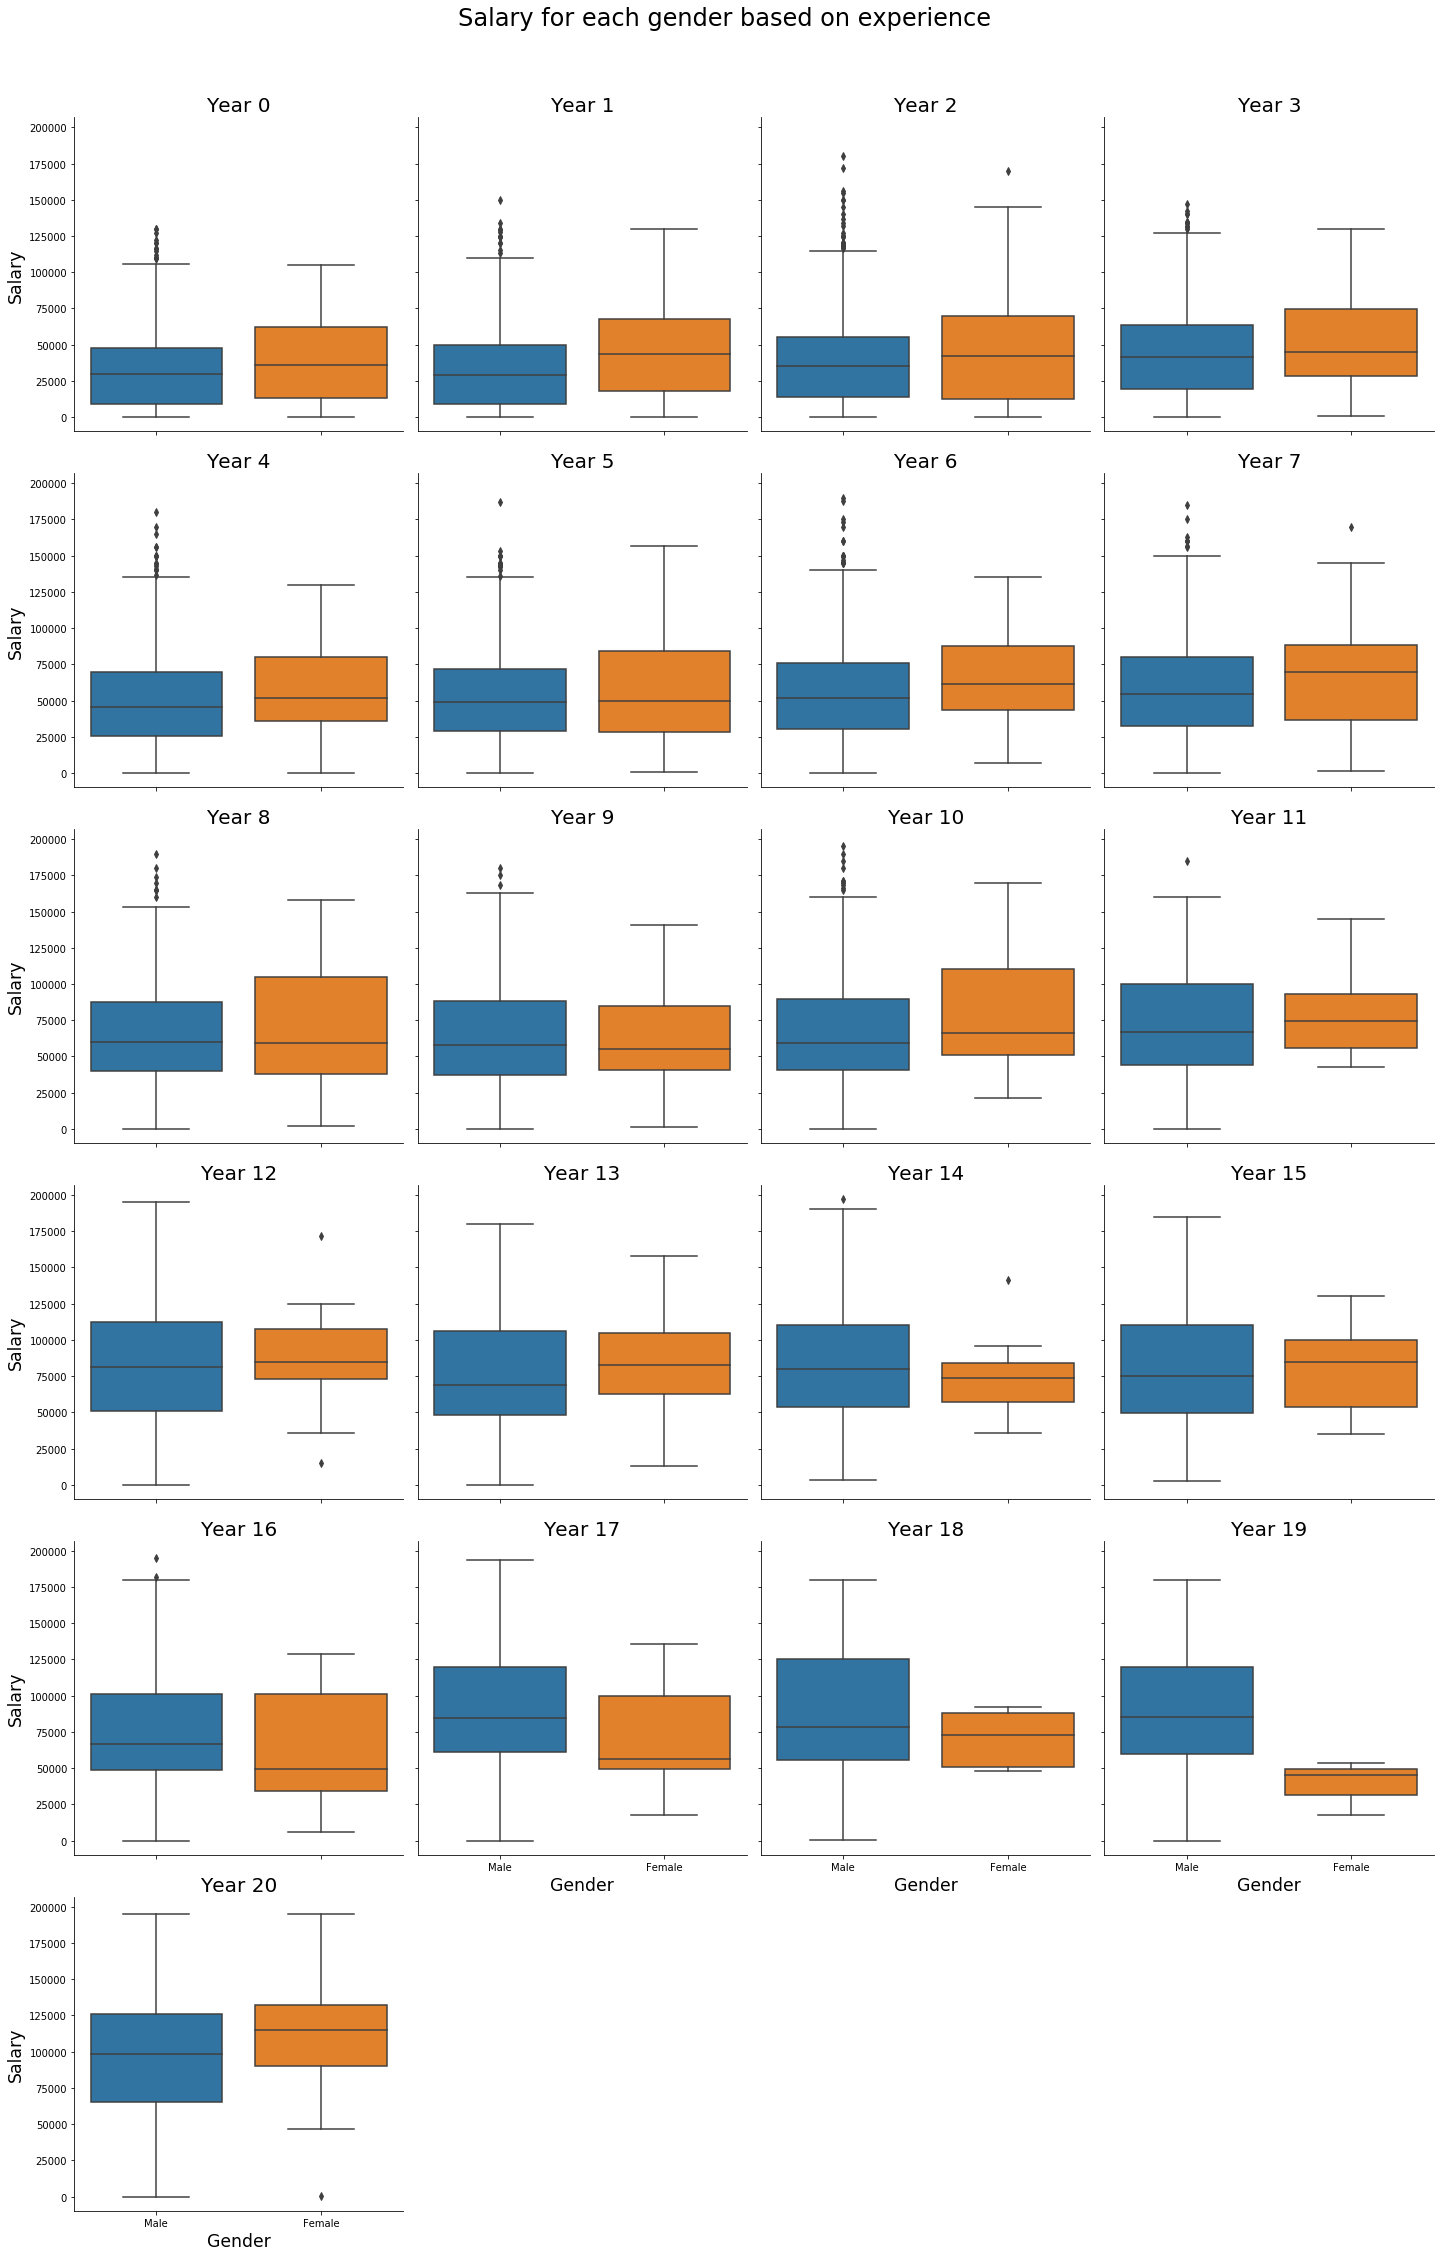

In [17]:
sub3 = sub2.query('Gender == "Male" | Gender == "Female"')
g= sns.catplot(data= sub3,  x = 'Gender', y = 'Salary', col="Year_Code", col_wrap=4,
                kind="box", col_order = n_order)
g.set_axis_labels("Gender", "Salary")
g.set_titles(col_template = 'Year {col_name}', size=20)
g.fig.suptitle('Salary for each gender based on experience', y=1.04, fontsize=24)
for ax in g.axes.flat:
    # This only works for the left ylabels
    ax.set_ylabel(ax.get_ylabel(), fontsize='xx-large')
    ax.set_xlabel(ax.get_xlabel(), fontsize='xx-large')

We can see the median of female's salary is about the same to the median of male's salary. The female has much less salary than male in Year 19 but the female has more salary than male in Year 20. It may due to female has less data point and become inconsistant. 

## Conclusion

1. How's the overall salay looks like?
we can see the most people has salary between 30k to 100k. 

2. The salary based on experience or gender.
The salary increase based on experience and it looks like a linear increasing on the salary.
The gender has no effect on the salary. (Male's salary and female's salary are equal.

3. The salary based on experience and gender.
The gender has no effect on the salary by different experience. 
The Year 19 is an outliers because Female's salary is higher than male's salary with both have 20 years of experience.